In [206]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
import math
from IPython import display 
pd.options.mode.chained_assignment = None

In [207]:
# import the output files from data cleaning script
clean_data_method1_2019 = pd.read_csv("processed data/clean_data_method1_2019.csv")
clean_data_method2_2019 = pd.read_csv("processed data/clean_data_method2_2019.csv")
static_info_2019 = pd.read_csv("processed data/static_info_2019.csv")

clean_data_method1_2020 = pd.read_csv("processed data/clean_data_method1_2020.csv")
clean_data_method2_2020 = pd.read_csv("processed data/clean_data_method2_2020.csv")
static_info_2020 = pd.read_csv("processed data/static_info_2020.csv")

In [208]:
list(clean_data_method1_2019['imo'].unique())

KeyError: 'imo'

**Merge dynamic info and static info**

In [209]:
# merge dynamic info and static info (map mmsi to imo)
df_method1_2019 = clean_data_method1_2019.merge(static_info_2019) 
df_method2_2019 = clean_data_method2_2019.merge(static_info_2019) 

df_method1_2020 = clean_data_method1_2020.merge(static_info_2020) 
df_method2_2020 = clean_data_method2_2020.merge(static_info_2020) 

In [210]:
percent1 = df_method2_2019.shape[0]/clean_data_method1_2019.shape[0]
print("Data remaining for 2019: {:.2%}".format(percent1))

percent2 = df_method2_2020.shape[0]/clean_data_method1_2020.shape[0]
print("Data remaining for 2020: {:.2%}".format(percent2))

Data remaining for 2019: 77.35%
Data remaining for 2020: 80.53%


In [217]:
print(df_method2_2019.shape[0]+df_method2_2020.shape[0])
print(clean_data_method1_2019.shape[0]+clean_data_method1_2020.shape[0])

640606
812037


**Pull vessel particulars from SG-MDH using API | estimated running time: 30 mins**

In [86]:
# Get a list of unique IMOs
a = list(df_method2_2019['imo'].unique())
b = list(df_method2_2020['imo'].unique())
resultList= list(set(a + b))
len(resultList)

19244

In [87]:
# #pull vessel particulars from SG-MDH using API
# vessel_info = []
# count = 0
# for imo in resultList:   
#     myUrl = 'https://sg-mdh-api.mpa.gov.sg/v1/vessel/particulars/imonumber/'+str(imo)
#     head = {'apikey': 'IV0UIb4Kr3HewPRXurWsWGHndiZb4G1n'}
#     response = requests.get(myUrl, headers=head)
#     count += 1
#     if count % 1000 == 0:
#         print(count)
#     if response.text!='':
#         vessel_info += response.json()

In [88]:
# while 'error' in vessel_info: vessel_info.remove('error')

# dfItem = pd.DataFrame(vessel_info,columns=['vesselName','imoNumber','flag','vesselType','grossTonnage','mmsiNumber','yearBuilt'])
# dfItem.to_csv('SG MDH data/vessel_info.csv', index=False)

**Merge AIS data with vessel info**

In [89]:
# import vessel info generated from last section
vessel_info = pd.read_csv("SG MDH data/vessel_info.csv")
vessel_info = vessel_info.drop_duplicates('imoNumber', keep='first')
vessel_info

,vesselName,imoNumber,flag,vesselType,grossTonnage,mmsiNumber,yearBuilt
0,ESSHU MARU,9666560,BS,LNG,136740,311000285,2014
1,HAMBURG CITY,9863170,PA,BULK CARRIER,25189,0,2020
2,TRADER,9437189,HK,CONTAINER SHIP,15334,477233100,2006
3,ASIA PEARL VII,9502726,SG,BULK CARRIER,22402,566599000,2008
4,NAUTICAL RUNA,9699335,LR,BULK CARRIER,36474,636017043,2015
...,...,...,...,...,...,...,...
19123,ALEXANDROS THEO,9207792,MH,BULK CARRIER,26010,538003567,2000
19124,OLYMPIC TRUST,9437177,MH,TANKER,170004,538005797,2010
19125,DUBLIN EAGLE,9699323,MH,BULK CARRIER,36474,538008631,2015
19126,SINDO 1,9043964,SG,FERRY BOAT,144,563917000,1991


In [90]:
#combine AIS data and vessel particulars
df_final_method1_2019 = df_method1_2019.merge(vessel_info,left_on="imo",right_on="imoNumber").drop(['imoNumber','mmsiNumber'],axis=1)
df_final_method2_2019 = df_method2_2019.merge(vessel_info,left_on="imo",right_on="imoNumber").drop(['imoNumber','mmsiNumber'],axis=1)

df_final_method1_2020 = df_method1_2020.merge(vessel_info,left_on="imo",right_on="imoNumber").drop(['imoNumber','mmsiNumber'],axis=1)
df_final_method2_2020 = df_method2_2020.merge(vessel_info,left_on="imo",right_on="imoNumber").drop(['imoNumber','mmsiNumber'],axis=1)

df_final_method1_2020

,mmsi,date,sum_fraction_of_max_fuel,avg_speed,imo,vesselName,flag,vesselType,grossTonnage,yearBuilt
0,219863000,2020-01-30,1.50,7.6,9778832,MONACO MAERSK,DK,CONTAINER SHIP,214286,2017
1,219863000,2020-01-31,0.99,6.3,9778832,MONACO MAERSK,DK,CONTAINER SHIP,214286,2017
2,219863000,2020-02-27,1.44,11.9,9778832,MONACO MAERSK,DK,CONTAINER SHIP,214286,2017
3,219863000,2020-02-28,0.03,1.1,9778832,MONACO MAERSK,DK,CONTAINER SHIP,214286,2017
4,219863000,2020-02-29,0.99,7.0,9778832,MONACO MAERSK,DK,CONTAINER SHIP,214286,2017
...,...,...,...,...,...,...,...,...,...,...
307975,636018743,2020-08-14,1.44,10.2,9419096,DELTA SPIRIT,LR,TANKER,85522,2010
307976,636018743,2020-11-10,2.40,6.7,9419096,DELTA SPIRIT,LR,TANKER,85522,2010
307977,636018743,2020-12-20,1.44,11.7,9419096,DELTA SPIRIT,LR,TANKER,85522,2010
307978,636019113,2020-03-16,1.44,10.4,9630248,W ARCTURUS,LR,BULK CARRIER,44009,2012


In [91]:
# map flag code to full name
def map_flag(df):
    flag = pd.read_json('SG MDH data/COUNTRIES_REF_JSON.json')[['nationality','countryCode']]
    df1 = df.merge(flag,left_on='flag',right_on='countryCode').drop(['flag','countryCode'],axis=1)
    df2 = df1.drop_duplicates(ignore_index = True)
    df2 = df2.rename(columns = {'nationality':'flag'}) 
    return df2

df_final1_method1_2019 = map_flag(df_final_method1_2019) 
df_final1_method2_2019 = map_flag(df_final_method2_2019) 

df_final1_method1_2020 = map_flag(df_final_method1_2020) 
df_final1_method2_2020 = map_flag(df_final_method2_2020) 

# remove record for year 2021
df_final1_method1_2020 = df_final1_method1_2020[df_final1_method1_2020['date']!='2021-01-01']
df_final1_method2_2020 = df_final1_method2_2020[df_final1_method2_2020['date']!='2021-01-01']

df_final1_method1_2020

,mmsi,date,sum_fraction_of_max_fuel,avg_speed,imo,vesselName,vesselType,grossTonnage,yearBuilt,flag
0,219863000,2020-01-30,1.50,7.6,9778832,MONACO MAERSK,CONTAINER SHIP,214286,2017,DANISH
1,219863000,2020-01-31,0.99,6.3,9778832,MONACO MAERSK,CONTAINER SHIP,214286,2017,DANISH
2,219863000,2020-02-27,1.44,11.9,9778832,MONACO MAERSK,CONTAINER SHIP,214286,2017,DANISH
3,219863000,2020-02-28,0.03,1.1,9778832,MONACO MAERSK,CONTAINER SHIP,214286,2017,DANISH
4,219863000,2020-02-29,0.99,7.0,9778832,MONACO MAERSK,CONTAINER SHIP,214286,2017,DANISH
...,...,...,...,...,...,...,...,...,...,...
304474,605266130,2020-10-03,2.40,8.7,9432361,AZAO,BULK CARRIER,32637,0,ALGERIAN
304475,622121410,2020-03-30,1.44,9.8,9460722,WADI ALBOSTAN,BULK CARRIER,33295,2010,EGYPTIAN
304476,622121410,2020-07-15,1.92,9.4,9460722,WADI ALBOSTAN,BULK CARRIER,33295,2010,EGYPTIAN
304477,622121410,2020-07-16,1.44,14.8,9460722,WADI ALBOSTAN,BULK CARRIER,33295,2010,EGYPTIAN


**Calculate Fuel Consumption and CO2 Emission <Method 1>**

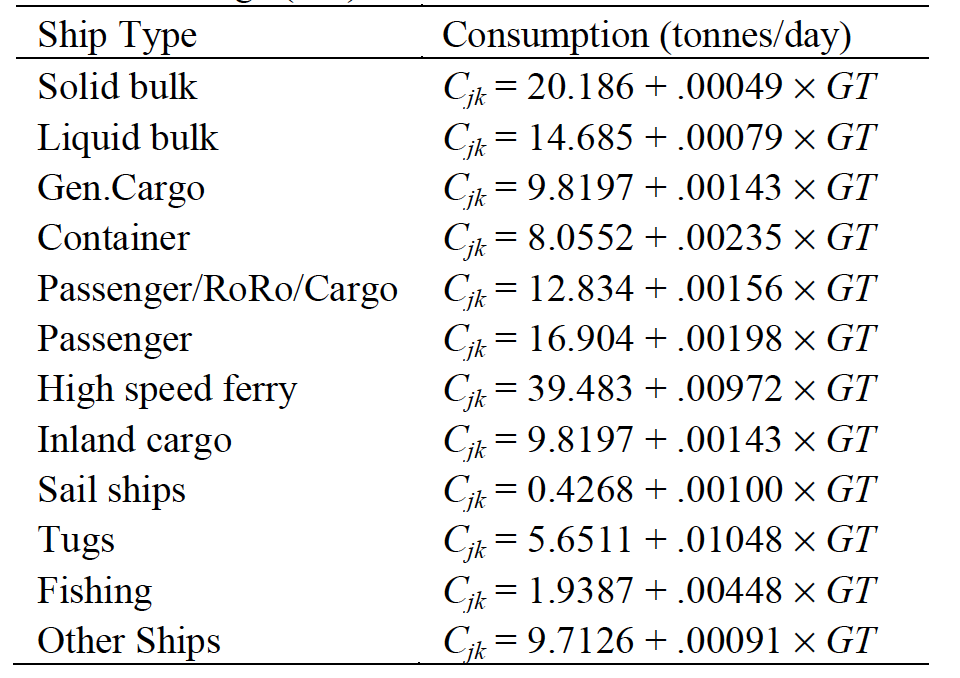

In [92]:
display.Image("pic1.png",width = 400)

In [93]:
# vessel types given in SG MDH data
df_final1_method1_2019.drop_duplicates('imo', keep='first')['vesselType'].value_counts()

BULK CARRIER                        4484
TANKER                              2875
CONTAINER SHIP                      1978
GENERAL CARGO                        901
CHEMICAL TANKER                      745
LPG                                  466
VEHICLE CARRIER                      413
TUG BOAT                             384
LNG                                  331
PETROLEUM/CHEMICAL TANKER            204
SUPPLY VESSEL                        170
PETROLEUM PRODUCT TANKER (>=60C)     134
PASSENGER VESSEL                      77
REEFER VESSEL                         59
PETROLEUM PRODUCT TANKER (<60C)       55
FERRY BOAT                            55
HEAVYLOAD SEMI-SUBMERSIBLE            52
UTILITY VESSEL                        48
TUG/SUPPLY VESSEL                     46
OFFSHORE SUPPLY VESSEL                45
DREDGER                               41
CRUDE OIL TANKER                      35
YACHT                                 34
RESEARCH/SURVEY VESSEL                33
FISHING VESSEL  

In [94]:
# map vessel types to general types listed in the table
def f(row):
    vesseltype = row['vesselType']
    if vesseltype == 'BULK CARRIER':
        val = 'Bulk carrier'
    elif ('TANKER' in vesseltype) or ('GAS' in vesseltype) or (vesseltype == 'LPG') or (vesseltype == 'LNG'):
        val = 'Tanker'
    elif vesseltype == 'GENERAL CARGO':
        val = 'General cargo'
    elif vesseltype == 'CONTAINER SHIP':
        val = 'Container'
    elif ('RORO' in vesseltype):
        val = 'RoRo'
    elif vesseltype == 'PASSENGER VESSEL':
        val = 'Passenger'
    elif vesseltype == 'FERRY BOAT':
        val = 'Ferry'
    elif ('TUG' in vesseltype):
        val = 'Tugs'
    else:
        val = 'Others'
    return val

def map_type(df):
    df['general_type'] = df.apply(f, axis=1)
    df1 = df[df['general_type']!='Others'].drop('vesselType',axis=1)
    return df1

df_final2_method1_2019 = map_type(df_final1_method1_2019)
df_final2_method1_2020 = map_type(df_final1_method1_2020)

In [95]:
df_final2_method1_2020

,mmsi,date,sum_fraction_of_max_fuel,avg_speed,imo,vesselName,grossTonnage,yearBuilt,flag,general_type
0,219863000,2020-01-30,1.50,7.6,9778832,MONACO MAERSK,214286,2017,DANISH,Container
1,219863000,2020-01-31,0.99,6.3,9778832,MONACO MAERSK,214286,2017,DANISH,Container
2,219863000,2020-02-27,1.44,11.9,9778832,MONACO MAERSK,214286,2017,DANISH,Container
3,219863000,2020-02-28,0.03,1.1,9778832,MONACO MAERSK,214286,2017,DANISH,Container
4,219863000,2020-02-29,0.99,7.0,9778832,MONACO MAERSK,214286,2017,DANISH,Container
...,...,...,...,...,...,...,...,...,...,...
304473,605266130,2020-05-22,1.44,10.3,9432361,AZAO,32637,0,ALGERIAN,Bulk carrier
304474,605266130,2020-10-03,2.40,8.7,9432361,AZAO,32637,0,ALGERIAN,Bulk carrier
304475,622121410,2020-03-30,1.44,9.8,9460722,WADI ALBOSTAN,33295,2010,EGYPTIAN,Bulk carrier
304476,622121410,2020-07-15,1.92,9.4,9460722,WADI ALBOSTAN,33295,2010,EGYPTIAN,Bulk carrier


In [96]:
# calculate fuel consumption and CO2 emission for each type
def f1(row):
    vesseltype = row['general_type']
    GT = row['grossTonnage']
    fraction = row['sum_fraction_of_max_fuel']
    if vesseltype == 'Bulk carrier':
        val = (20.186 + 0.00049 * GT)
    elif vesseltype == 'Tanker':
        val = (14.685 + 0.00079 * GT)
    elif vesseltype == 'General cargo':
        val = (9.8197 + 0.00143 * GT)
    elif vesseltype == 'Container':
        val = (8.0552 + 0.00235 * GT)
    elif vesseltype == 'RoRo':
        val = (12.834 + 0.00156 * GT)
    elif vesseltype == 'Passenger':
        val = (16.904 + 0.00198 * GT)
    elif vesseltype == 'Ferry':
        val = (39.483 + 0.00972 * GT)
    elif vesseltype == 'Tugs':
        val = (5.6511 + 0.01048 * GT)
    return val/24*fraction

def fuel_consump(df):
    df1 = df.copy()
    df1['fuel_consumption(ton)'] = df1.apply(f1, axis=1)
    df1['CO2_emission(ton)'] = df1['fuel_consumption(ton)']*3.173
    return df1

df_final3_method1_2019 = fuel_consump(df_final2_method1_2019)
df_final3_method1_2020 = fuel_consump(df_final2_method1_2020)

In [97]:
df_final3_method1_2020

,mmsi,date,sum_fraction_of_max_fuel,avg_speed,imo,vesselName,grossTonnage,yearBuilt,flag,general_type,fuel_consumption(ton),CO2_emission(ton)
0,219863000,2020-01-30,1.50,7.6,9778832,MONACO MAERSK,214286,2017,DANISH,Container,31.976706,101.462089
1,219863000,2020-01-31,0.99,6.3,9778832,MONACO MAERSK,214286,2017,DANISH,Container,21.104626,66.964979
2,219863000,2020-02-27,1.44,11.9,9778832,MONACO MAERSK,214286,2017,DANISH,Container,30.697638,97.403605
3,219863000,2020-02-28,0.03,1.1,9778832,MONACO MAERSK,214286,2017,DANISH,Container,0.639534,2.029242
4,219863000,2020-02-29,0.99,7.0,9778832,MONACO MAERSK,214286,2017,DANISH,Container,21.104626,66.964979
...,...,...,...,...,...,...,...,...,...,...,...,...
304473,605266130,2020-05-22,1.44,10.3,9432361,AZAO,32637,0,ALGERIAN,Bulk carrier,2.170688,6.887592
304474,605266130,2020-10-03,2.40,8.7,9432361,AZAO,32637,0,ALGERIAN,Bulk carrier,3.617813,11.479321
304475,622121410,2020-03-30,1.44,9.8,9460722,WADI ALBOSTAN,33295,2010,EGYPTIAN,Bulk carrier,2.190033,6.948975
304476,622121410,2020-07-15,1.92,9.4,9460722,WADI ALBOSTAN,33295,2010,EGYPTIAN,Bulk carrier,2.920044,9.265300


**Calculate Fuel Consumption and CO2 Emission <Method 2>**

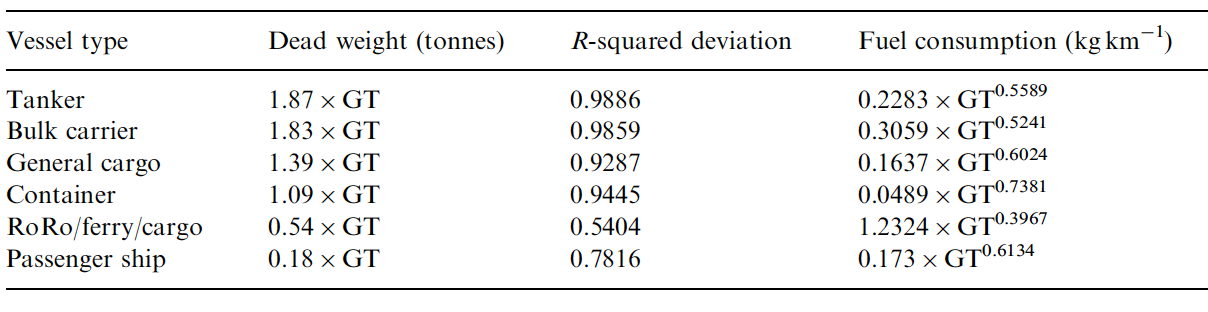

In [98]:
display.Image("pic2.png",width = 700)

In [99]:
# map vessel types to general types listed in the table
def f2(row):
    vesseltype = row['vesselType']
    if ('TANKER' in vesseltype) or ('GAS' in vesseltype) or (vesseltype == 'LPG') or (vesseltype == 'LNG'):
        val = 'Tanker'
    elif vesseltype == 'BULK CARRIER':
        val = 'Bulk carrier'
    elif vesseltype == 'GENERAL CARGO':
        val = 'General cargo'
    elif vesseltype == 'CONTAINER SHIP':
        val = 'Container'
    elif 'RORO' in vesseltype:
        val = 'RoRo'
    elif vesseltype == 'FERRY BOAT':
        val = 'Ferry'
    elif vesseltype == 'PASSENGER VESSEL':
        val = 'Passenger'     
    else:
        val = 'Others'
    return val

def map_type_m2(df):
    df['general_type'] = df.apply(f2, axis=1)
    df1 = df[df['general_type']!='Others'].drop('vesselType',axis=1)
    return df1

df_final2_method2_2019 = map_type_m2(df_final1_method2_2019)
df_final2_method2_2020 = map_type_m2(df_final1_method2_2020)

In [100]:
df_final2_method1_2020

,mmsi,date,sum_fraction_of_max_fuel,avg_speed,imo,vesselName,grossTonnage,yearBuilt,flag,general_type
0,219863000,2020-01-30,1.50,7.6,9778832,MONACO MAERSK,214286,2017,DANISH,Container
1,219863000,2020-01-31,0.99,6.3,9778832,MONACO MAERSK,214286,2017,DANISH,Container
2,219863000,2020-02-27,1.44,11.9,9778832,MONACO MAERSK,214286,2017,DANISH,Container
3,219863000,2020-02-28,0.03,1.1,9778832,MONACO MAERSK,214286,2017,DANISH,Container
4,219863000,2020-02-29,0.99,7.0,9778832,MONACO MAERSK,214286,2017,DANISH,Container
...,...,...,...,...,...,...,...,...,...,...
304473,605266130,2020-05-22,1.44,10.3,9432361,AZAO,32637,0,ALGERIAN,Bulk carrier
304474,605266130,2020-10-03,2.40,8.7,9432361,AZAO,32637,0,ALGERIAN,Bulk carrier
304475,622121410,2020-03-30,1.44,9.8,9460722,WADI ALBOSTAN,33295,2010,EGYPTIAN,Bulk carrier
304476,622121410,2020-07-15,1.92,9.4,9460722,WADI ALBOSTAN,33295,2010,EGYPTIAN,Bulk carrier


In [101]:
# calculate fuel consumption and CO2 emission for each type
def f3(row):
    vesseltype = row['general_type']
    GT = row['grossTonnage']
    distance = row['distance_daily(km)']
    if vesseltype == 'Tanker':
        val = 0.2283*(GT**0.5589)*distance
    elif vesseltype == 'Bulk carrier':
        val = 0.3059*(GT**0.5241)*distance
    elif vesseltype == 'General cargo':
        val = 0.1637*(GT**0.6024)*distance
    elif vesseltype == 'Container':
        val = 0.0489*(GT**0.7381)*distance
    elif (vesseltype == 'RoRo') or (vesseltype =='Ferry'):
        val = 1.2324*(GT**0.3967)*distance
    elif vesseltype == 'Passenger':
        val = 0.173*(GT**0.6134)*distance
    return val/1000

def fuel_consump_m2(df):
    df1 = df.copy()
    df1['fuel_consumption(ton)'] = df1.apply(f3, axis=1)
    df1['CO2_emission(ton)'] = df1['fuel_consumption(ton)']*3.173
    return df1

df_final3_method2_2019 = fuel_consump_m2(df_final2_method2_2019)
df_final3_method2_2020 = fuel_consump_m2(df_final2_method2_2020)

In [102]:
df_final3_method1_2020

,mmsi,date,sum_fraction_of_max_fuel,avg_speed,imo,vesselName,grossTonnage,yearBuilt,flag,general_type,fuel_consumption(ton),CO2_emission(ton)
0,219863000,2020-01-30,1.50,7.6,9778832,MONACO MAERSK,214286,2017,DANISH,Container,31.976706,101.462089
1,219863000,2020-01-31,0.99,6.3,9778832,MONACO MAERSK,214286,2017,DANISH,Container,21.104626,66.964979
2,219863000,2020-02-27,1.44,11.9,9778832,MONACO MAERSK,214286,2017,DANISH,Container,30.697638,97.403605
3,219863000,2020-02-28,0.03,1.1,9778832,MONACO MAERSK,214286,2017,DANISH,Container,0.639534,2.029242
4,219863000,2020-02-29,0.99,7.0,9778832,MONACO MAERSK,214286,2017,DANISH,Container,21.104626,66.964979
...,...,...,...,...,...,...,...,...,...,...,...,...
304473,605266130,2020-05-22,1.44,10.3,9432361,AZAO,32637,0,ALGERIAN,Bulk carrier,2.170688,6.887592
304474,605266130,2020-10-03,2.40,8.7,9432361,AZAO,32637,0,ALGERIAN,Bulk carrier,3.617813,11.479321
304475,622121410,2020-03-30,1.44,9.8,9460722,WADI ALBOSTAN,33295,2010,EGYPTIAN,Bulk carrier,2.190033,6.948975
304476,622121410,2020-07-15,1.92,9.4,9460722,WADI ALBOSTAN,33295,2010,EGYPTIAN,Bulk carrier,2.920044,9.265300


**Result1: Method Comparison**

In [151]:
# 2019 method 1 vs method 2
df1 = df_final3_method1_2019.groupby('general_type')['CO2_emission(ton)'].sum().round().reset_index()
df2 = df_final3_method2_2019.groupby('general_type')['CO2_emission(ton)'].sum().round().reset_index()
temp = df1.merge(df2, on = 'general_type',how = 'left')
temp

,general_type,CO2_emission(ton)_x,CO2_emission(ton)_y
0,Bulk carrier,147963.0,241783.0
1,Container,937819.0,926101.0
2,Ferry,136654.0,50945.0
3,General cargo,27222.0,39374.0
4,Passenger,24082.0,25020.0
5,RoRo,8298.0,6182.0
6,Tanker,817567.0,896986.0
7,Tugs,131641.0,NaN


<AxesSubplot:title={'center':'CO2 Emission in 2019 by Method 1 vs Method 2'}, xlabel='Vessel type', ylabel='Emission (tonne)'>

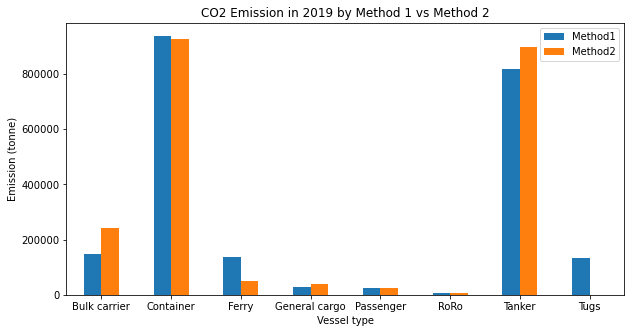

In [153]:
temp.columns = ['Vessel type',"Method1","Method2"]
temp.plot.bar(x = 'Vessel type', title="CO2 Emission in 2019 by Method 1 vs Method 2", 
              ylabel = "Emission (tonne)",rot = 0, figsize=(10, 5))

In [154]:
# 2020 method 1 vs method 2
df1 = df_final3_method1_2020.groupby('general_type')['CO2_emission(ton)'].sum().round().reset_index()
df2 = df_final3_method2_2020.groupby('general_type')['CO2_emission(ton)'].sum().round().reset_index()
df1.merge(df2, on = 'general_type',how = 'left')

,general_type,CO2_emission(ton)_x,CO2_emission(ton)_y
0,Bulk carrier,170351.0,280810.0
1,Container,960540.0,928537.0
2,Ferry,33247.0,12105.0
3,General cargo,26976.0,38997.0
4,Passenger,17967.0,17276.0
5,RoRo,8435.0,5991.0
6,Tanker,862670.0,955154.0
7,Tugs,133117.0,NaN


In [155]:
# combine method 1 and 2 results
combined_2019 = df_final3_method1_2019.merge(df_final3_method2_2019[['mmsi','date','fuel_consumption(ton)','CO2_emission(ton)']], on=['mmsi','date'],how='left')
combined_2020 = df_final3_method1_2020.merge(df_final3_method2_2020[['mmsi','date','fuel_consumption(ton)','CO2_emission(ton)']], on=['mmsi','date'],how='left')

def f4(row):
    vesseltype = row['general_type']
    carbon1 = row['CO2_emission(ton)_x']
    carbon2 = row['CO2_emission(ton)_y']
    if vesseltype == 'Tugs':
        val = carbon1
    else:
        val = (carbon1 + carbon2)/2
    return val

def fuel_consump_avg(df):
    df1 = df.copy()
    df1['CO2_emission(ton)_avg'] = df1.apply(f4, axis=1)
    return df1

combined1_2019= fuel_consump_avg(combined_2019)[['mmsi','imo','date','grossTonnage','yearBuilt','flag','general_type','CO2_emission(ton)_avg']]
combined1_2020= fuel_consump_avg(combined_2020)[['mmsi','imo','date','grossTonnage','yearBuilt','flag','general_type','CO2_emission(ton)_avg']]

**Result2: Yearly Comparison**

*by vessel type*

<AxesSubplot:title={'center':'Vessel Flag Distribution 2019'}>

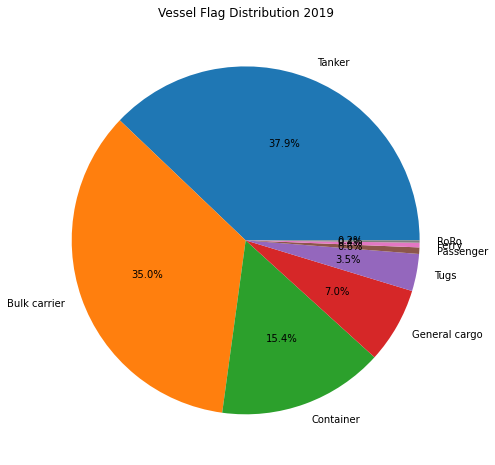

In [156]:
plottype19 = combined1_2019.drop_duplicates('imo', keep='first')
plottype19['general_type'].value_counts().plot(kind='pie',figsize=(8, 8),fontsize = 10,ylabel = '',
                                               autopct='%1.1f%%',title = "Vessel Flag Distribution 2019")

<AxesSubplot:title={'center':'No. of unique vessels in 2019 vs 2020 by type'}, xlabel='Vessel type', ylabel='No. of vessels'>

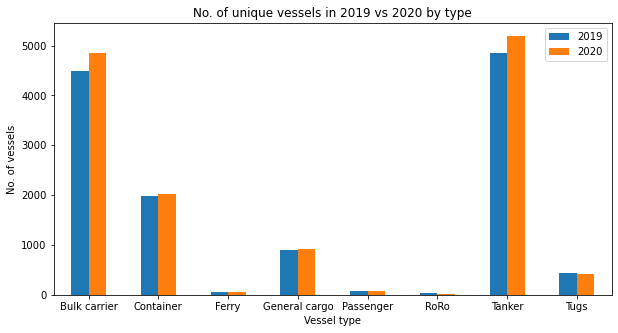

In [158]:
# compare no. of unique vessels in 2019 vs 2020 by type
plottype19 = combined1_2019.drop_duplicates('imo', keep='first').groupby('general_type')['imo'].count().reset_index()
plottype20 = combined1_2020.drop_duplicates('imo', keep='first').groupby('general_type')['imo'].count().reset_index()
plottype = plottype19.merge(plottype20,on='general_type')
plottype.columns = ['Vessel type',"2019","2020"]
plottype.plot.bar(x = 'Vessel type', title="No. of unique vessels in 2019 vs 2020 by type", 
                  ylabel = 'No. of vessels',rot = 0, figsize=(10, 5))

In [159]:
# compare averge result of 2019 vs 2020
df1 = combined1_2019.groupby('general_type')['CO2_emission(ton)_avg'].sum().round(0).reset_index()
df2 = combined1_2020.groupby('general_type')['CO2_emission(ton)_avg'].sum().round(0).reset_index()
df = df1.merge(df2,on="general_type")
#df = df.append(df.sum(numeric_only=True), ignore_index=True) #add 'total' row
df.columns = ['Vessel type',"CO2 emission(ton) in 2019","CO2 emission(ton) in 2020"]
df['Percentage change'] = (df['CO2 emission(ton) in 2020']-df['CO2 emission(ton) in 2019'])/df['CO2 emission(ton) in 2019']
df['Percentage change'] = df['Percentage change'].astype(float).map("{:.2%}".format)
df

,Vessel type,CO2 emission(ton) in 2019,CO2 emission(ton) in 2020,Percentage change
0,Bulk carrier,194352.0,224868.0,15.70%
1,Container,931052.0,943183.0,1.30%
2,Ferry,93785.0,22673.0,-75.82%
3,General cargo,33174.0,32895.0,-0.84%
4,Passenger,24549.0,17590.0,-28.35%
5,RoRo,7235.0,7182.0,-0.73%
6,Tanker,852294.0,904688.0,6.15%
7,Tugs,131641.0,133117.0,1.12%


<AxesSubplot:title={'center':'CO2 Emission in 2019 vs 2020 By Vessel Type'}, xlabel='Vessel type', ylabel='Emission (tonne)'>

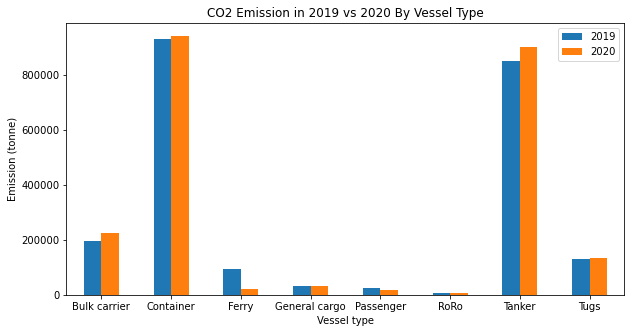

In [161]:
# bar chart for CO2 emissions in 2019 vs 2020 (by vessel type)
df.columns = ['Vessel type',"2019","2020",'change']
df.plot.bar(x = 'Vessel type', ylabel = "Emission (tonne)",
            title="CO2 Emission in 2019 vs 2020 By Vessel Type", rot = 0, figsize=(10, 5))

Text(0.5, 1.0, 'Gross Tonnage Distribution by Vessel Type')

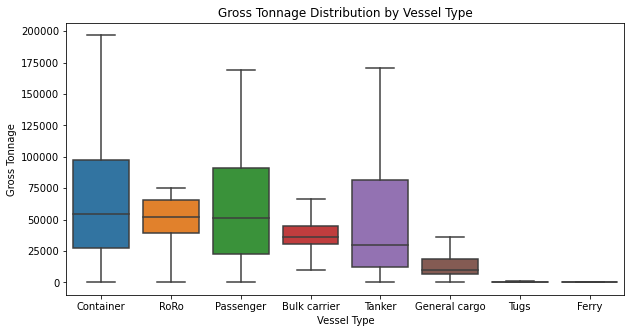

In [163]:
# gross tonnage box plot by type
plotgt =  pd.concat([combined1_2019,combined1_2020],ignore_index=True).drop_duplicates('imo', keep='first')
plotgt = plotgt.rename(columns={'grossTonnage':'Gross Tonnage','general_type':'Vessel Type'})
plotgt = plotgt.groupby('Vessel Type').apply(lambda grp: grp.assign(median=grp['Gross Tonnage'].median()))
plotgt = plotgt.sort_values('median',ascending= False)

# sns.set_style("whitegrid") 
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'Vessel Type', y = 'Gross Tonnage', 
             data = plotgt, showfliers=False).set_title("Gross Tonnage Distribution by Vessel Type")

*by vessel flag*

<AxesSubplot:title={'center':'Vessel Flag Distribution'}>

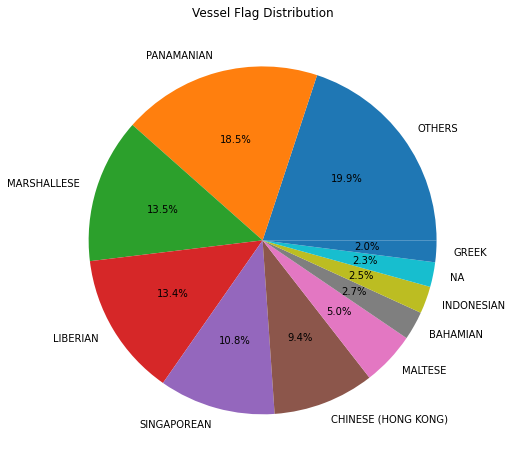

In [165]:
# bar chart for flag

plotflag =  pd.concat([combined1_2019,combined1_2020],ignore_index=True).drop_duplicates('imo', keep='first')
plotflag = plotflag.rename(columns={'general_type':'Vessel Type'})


# gather other countries
plotflag['flag'] = plotflag['flag'].apply(lambda x: 'NA' if x == '' else x)
def other_country(df):
    counts = df['flag'].value_counts()
    idx = counts[counts.lt(0.02*df.shape[0])].index
    df.loc[df['flag'].isin(idx), 'flag'] = 'OTHERS'
    return df
plotflag = other_country(plotflag)

plotflag['flag'].value_counts().plot(kind='pie',figsize=(8, 8),fontsize = 10,ylabel = '',
                                               autopct='%1.1f%%',title = "Vessel Flag Distribution")

In [166]:
# bar chart for CO2 emissions in 2019 vs 2020 (for top 10 flags)
df1 = combined1_2019.groupby('flag')['CO2_emission(ton)_avg'].sum().round(0).reset_index()
df2 = combined1_2020.groupby('flag')['CO2_emission(ton)_avg'].sum().round(0).reset_index()
df_flag = df1.merge(df2,on="flag")
df_flag.sort_values('CO2_emission(ton)_avg_x', ascending=False, inplace=True)
df_flag.columns = ['flag',"CO2 emission(ton) in 2019","CO2 emission(ton) in 2020"]
df_flag['Percentage change'] = (df_flag['CO2 emission(ton) in 2020']-df_flag['CO2 emission(ton) in 2019'])/df_flag['CO2 emission(ton) in 2019']
df_flag['Percentage change'] = df_flag['Percentage change'].astype(float).map("{:.2%}".format)
df_flag.head(10)

,flag,CO2 emission(ton) in 2019,CO2 emission(ton) in 2020,Percentage change
62,SINGAPOREAN,563306.0,503166.0,-10.68%
55,PANAMANIAN,323783.0,337003.0,4.08%
41,LIBERIAN,265305.0,283082.0,6.70%
48,MARSHALLESE,244463.0,215103.0,-12.01%
16,CHINESE (HONG KONG),219383.0,239029.0,8.96%
46,MALTESE,120716.0,134258.0,11.22%
20,DANISH,59803.0,76367.0,27.70%
3,BAHAMIAN,45662.0,73236.0,60.39%
36,INDONESIAN,39045.0,34197.0,-12.42%
45,MALAYSIAN,35149.0,38162.0,8.57%


<AxesSubplot:title={'center':'CO2 Emission in 2019 vs 2020 for Top 10 Flags'}, xlabel='Flag', ylabel='Emission (tonne)'>

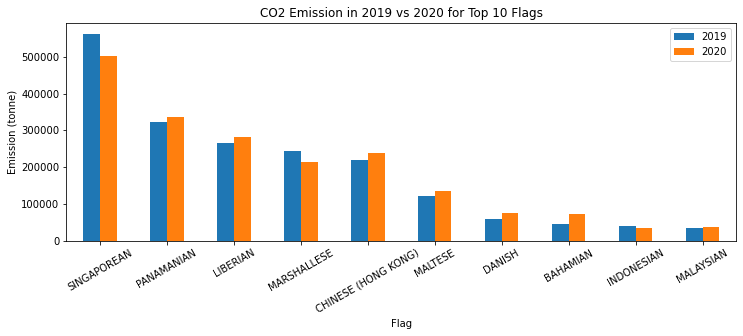

In [168]:
df_flag.columns = ['Flag','2019','2020','change']
df_flag.head(10).plot.bar(x = 'Flag', ylabel = "Emission (tonne)",
                          title="CO2 Emission in 2019 vs 2020 for Top 10 Flags", rot = 30, figsize=(12, 4))

[Text(0, 0, 'DANISH'),
 Text(1, 0, 'MALTESE'),
 Text(2, 0, 'LIBERIAN'),
 Text(3, 0, 'CHINESE (HONG KONG)'),
 Text(4, 0, 'BAHAMIAN'),
 Text(5, 0, 'MARSHALLESE'),
 Text(6, 0, 'PANAMANIAN'),
 Text(7, 0, 'SINGAPOREAN'),
 Text(8, 0, 'MALAYSIAN'),
 Text(9, 0, 'INDONESIAN')]

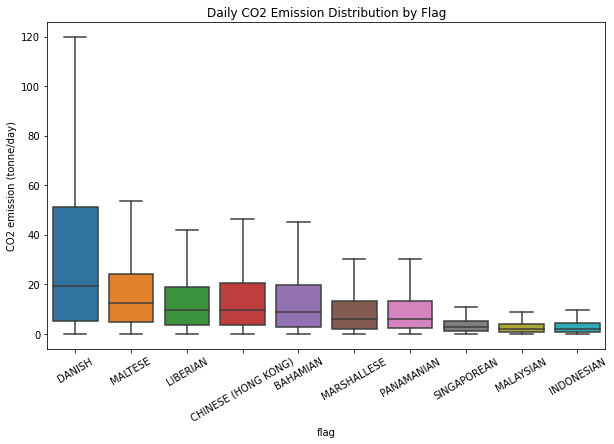

In [115]:
# overall box plot for top 10 flags (sorted by median)
df_combined = pd.concat([combined1_2019,combined1_2020],ignore_index=True)
df_subset = df_combined[df_combined['flag'].isin(df_flag.head(10)['Flag'])]
df_subset = df_subset.rename(columns={'CO2_emission(ton)_avg':'CO2 emission (tonne/day)','general_type':'Vessel Type'})

df_subset = df_subset.groupby('flag').apply(lambda grp: grp.assign(median=grp['CO2 emission (tonne/day)'].median()))
df_subset = df_subset.sort_values('median',ascending= False)

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x = 'flag', y = 'CO2 emission (tonne/day)', data = df_subset,showfliers=False)
ax.set_title("Daily CO2 Emission Distribution by Flag")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

*by age group*

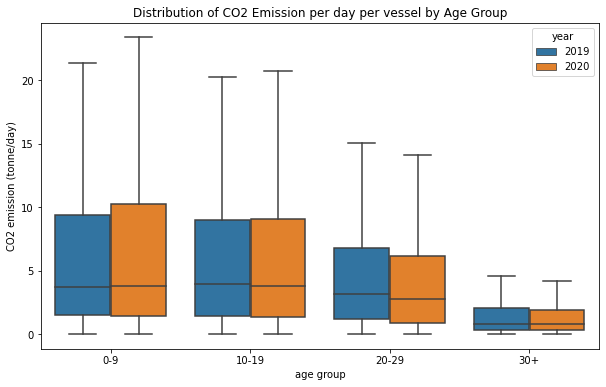

In [116]:
# overall box plot by age groups
plotage = pd.concat([combined1_2019,combined1_2020],ignore_index=True)
plotage = plotage[plotage.yearBuilt>0]
plotage['year']= plotage.apply(lambda row: int(row['date'][0:4]),axis = 1)
plotage['age'] = plotage.apply(lambda row: int(row['year']) - row['yearBuilt'],axis = 1)
plotage = plotage[plotage.age>=0]
plotage = plotage.rename(columns={'CO2_emission(ton)_avg':'CO2 emission (tonne/day)'})

bins = [0,10,20,30,100]
labels = ['0-9', '10-19', '20-29', '30+']
plotage['age group'] = pd.cut(plotage.age, bins, labels = labels,include_lowest = True)

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x = 'age group', y = 'CO2 emission (tonne/day)',hue='year',
                  data = plotage,showfliers=False).set_title("Distribution of CO2 Emission per day per vessel by Age Group")

In [117]:
plotage.groupby(['year','age group'])['imo'].nunique().reset_index()

,year,age group,imo
0,2019,0-9,7305
1,2019,10-19,4204
2,2019,20-29,901
3,2019,30+,81
4,2020,0-9,7234
5,2020,10-19,4948
6,2020,20-29,944
7,2020,30+,74


<AxesSubplot:title={'center':'CO2 Emission in 2019 vs 2020 By Age Groups'}, xlabel='Age group', ylabel='Emission (tonne)'>

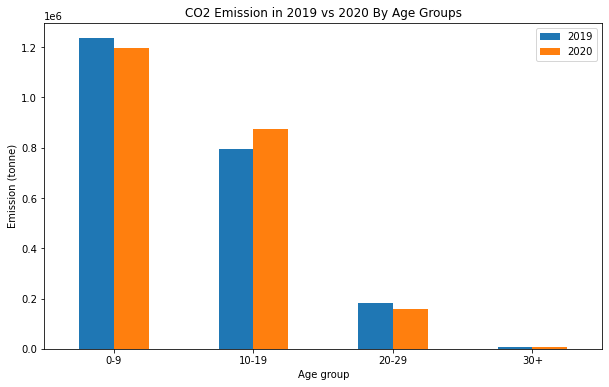

In [118]:
df1 = plotage[plotage['year']==2019].groupby('age group')['CO2 emission (tonne/day)'].sum().round(0).reset_index()
df2 = plotage[plotage['year']==2020].groupby('age group')['CO2 emission (tonne/day)'].sum().round(0).reset_index()

df_age = df1.merge(df2,on="age group")

df_age.columns = ['Age group','2019','2020']
df_age.plot.bar(x = 'Age group', ylabel = "Emission (tonne)",
                          title="CO2 Emission in 2019 vs 2020 By Age Groups", rot = 0, figsize=(10, 6))

Text(0.5, 1.0, 'Average Operating Speed Distribution by Vessel Age')

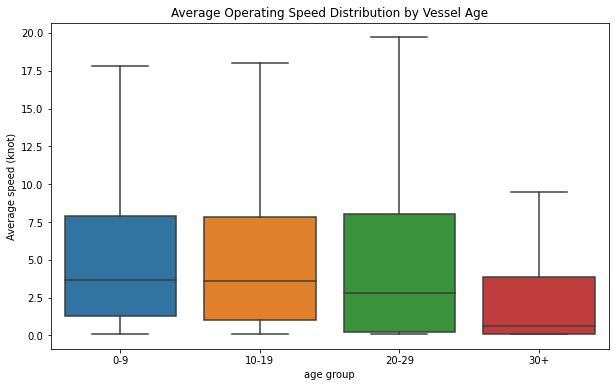

In [119]:
plotspeed = pd.concat([df_final3_method1_2019,df_final3_method1_2020],ignore_index=True)
plotspeed = plotspeed[plotspeed.yearBuilt>0]
plotspeed['year']= plotspeed.apply(lambda row: int(row['date'][0:4]),axis = 1)
plotspeed['age'] = plotspeed.apply(lambda row: int(row['year']) - row['yearBuilt'],axis = 1)
plotspeed = plotspeed[plotspeed.age>=0]
plotspeed = plotspeed.rename(columns={'CO2_emission(ton)_avg':'CO2 emission (tonne/day)','avg_speed':'Average speed (knot)'})

bins = [0,10,20,30,100]
labels = ['0-9', '10-19', '20-29', '30+']
plotspeed['age group'] = pd.cut(plotspeed.age, bins, labels = labels,include_lowest = True)
plotspeed

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'age group', y = 'Average speed (knot)', 
             data = plotspeed, showfliers=False).set_title("Average Operating Speed Distribution by Vessel Age")

Text(0.5, 1.0, 'Gross Tonnage Distribution by Vessel Age')

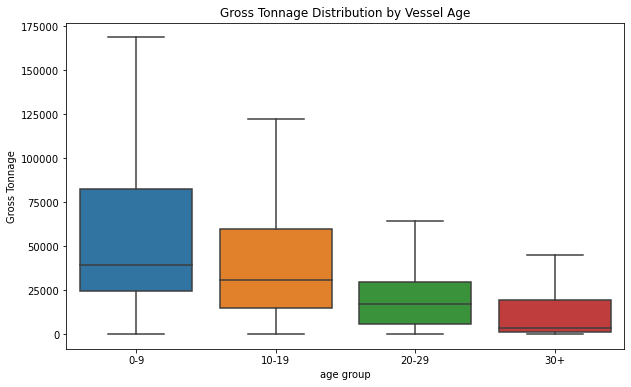

In [120]:
plotgt1 = plotage.drop_duplicates('imo', keep='first').rename(columns={'grossTonnage':'Gross Tonnage'})

# sns.set_style("whitegrid") 
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'age group', y = 'Gross Tonnage', 
             data = plotgt1, showfliers=False).set_title("Gross Tonnage Distribution by Vessel Age")

In [121]:
plotgt1 = plotage.drop_duplicates('imo', keep='first')

In [ ]:
#monthly comparison

In [169]:
df_m = df_combined.copy()
df_m['month'] = pd.DatetimeIndex(df_m['date']).month
df_m.head()

,mmsi,imo,date,grossTonnage,yearBuilt,flag,Vessel type,CO2_emission(ton)_avg,month
0,219163000,9410973,2019-01-01,84410,2011,DANISH,Tanker,1.034664,1
218540,565709000,9384083,2019-01-01,4867,2007,SINGAPOREAN,Tanker,3.737883,1
124780,563021112,9551442,2019-01-01,327,2010,SINGAPOREAN,Tugs,0.036006,1
124826,564027000,9551442,2019-01-01,327,2010,SINGAPOREAN,Tugs,4.284697,1
218423,566378000,9402811,2019-01-01,11999,2007,SINGAPOREAN,Tanker,2.485194,1


In [170]:
# add month
def get_m(d):
    return "%d_%s" % (d.year, ('%02d' % d.month))

combined1_2019['month'] = combined1_2019['date'].apply(lambda x: get_m(datetime.strptime(x,"%Y-%m-%d")))
combined1_2020['month'] = combined1_2020['date'].apply(lambda x: get_m(datetime.strptime(x,"%Y-%m-%d")))
df_combined = pd.concat([combined1_2019,combined1_2020],ignore_index=True)
df_combined = df_combined.rename(columns={'general_type':'Vessel type'}).sort_values('date')
df_combined

,mmsi,imo,date,grossTonnage,yearBuilt,flag,Vessel type,CO2_emission(ton)_avg,month
0,219163000,9410973,2019-01-01,84410,2011,DANISH,Tanker,1.034664,2019_01
218540,565709000,9384083,2019-01-01,4867,2007,SINGAPOREAN,Tanker,3.737883,2019_01
124780,563021112,9551442,2019-01-01,327,2010,SINGAPOREAN,Tugs,0.036006,2019_01
124826,564027000,9551442,2019-01-01,327,2010,SINGAPOREAN,Tugs,4.284697,2019_01
218423,566378000,9402811,2019-01-01,11999,2007,SINGAPOREAN,Tanker,2.485194,2019_01
...,...,...,...,...,...,...,...,...,...
529417,258749000,9258612,2020-12-31,27357,2004,NORWEGIAN,Tanker,6.966650,2020_12
559400,352785000,9183374,2020-12-31,149376,2013,THAI,Tanker,4.472942,2020_12
556649,542193110,1234567,2020-12-31,3341,0,THAI,Tanker,0.293748,2020_12
302427,354077000,9376933,2020-12-31,8455,2007,PANAMANIAN,Tanker,2.280869,2020_12


<AxesSubplot:title={'center':'CO2 Emission Across Months'}, xlabel='Month', ylabel='Emission (tonne)'>

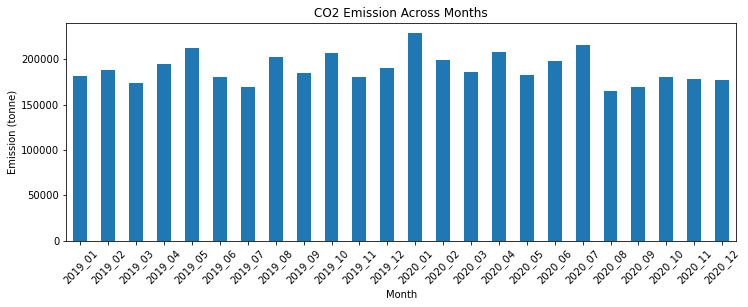

In [171]:
plotq = df_combined.groupby('month')['CO2_emission(ton)_avg'].sum().round(0).reset_index()
plotq.plot(kind='bar',x = 'month', y = 'CO2_emission(ton)_avg',legend = False, ylabel = 'Emission (tonne)',
          figsize=(12, 4),rot = 45,title = "CO2 Emission Across Months",xlabel = 'Month') 

Vessel type,Bulk carrier,Container,Ferry,General cargo,Passenger,RoRo,Tanker,Tugs
month,,,,,,,,
2019_01,15945.0,74046.0,7044.0,2565.0,2918.0,535.0,67577.0,10702.0
2019_02,15708.0,74813.0,7501.0,2809.0,3573.0,496.0,72132.0,11530.0
2019_03,13837.0,73255.0,6441.0,2443.0,2408.0,573.0,64383.0,10197.0
2019_04,16884.0,80320.0,8313.0,2792.0,1894.0,672.0,72327.0,11665.0
2019_05,17440.0,88830.0,8465.0,3339.0,2446.0,685.0,79730.0,12140.0
2019_06,14625.0,75266.0,7104.0,2695.0,1777.0,607.0,68039.0,10064.0
2019_07,14419.0,70922.0,7024.0,2515.0,583.0,502.0,63572.0,9798.0
2019_08,17877.0,83198.0,8553.0,2966.0,952.0,649.0,76621.0,11475.0
2019_09,17827.0,74340.0,8097.0,2930.0,1052.0,565.0,68913.0,10925.0


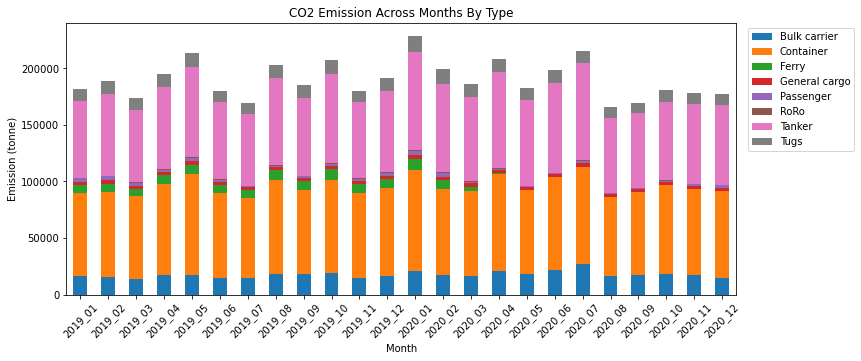

In [192]:
# compare emission in each quarter by type
plotstack = df_combined.groupby(['month','Vessel type'])['CO2_emission(ton)_avg'].sum().round(0).unstack()
plotstack.plot(kind='bar',stacked=True,figsize=(12, 5), xlabel = 'Month',ylabel = 'Emission (tonne)',rot = 45,title = "CO2 Emission Across Months By Type") 
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', ncol=1)
plotstack

**Result3: Quarterly Comparison**

In [194]:
# add quarter
def get_q(d):
    return "%d_Q%d" % (d.year, math.ceil(d.month/3),)

combined1_2019['quarter'] = combined1_2019['date'].apply(lambda x: get_q(datetime.strptime(x,"%Y-%m-%d")))
combined1_2020['quarter'] = combined1_2020['date'].apply(lambda x: get_q(datetime.strptime(x,"%Y-%m-%d")))
df_combined = pd.concat([combined1_2019,combined1_2020],ignore_index=True)
df_combined = df_combined.rename(columns={'general_type':'Vessel type'})
df_combined

,mmsi,imo,date,grossTonnage,yearBuilt,flag,Vessel type,CO2_emission(ton)_avg,month,quarter
0,219163000,9410973,2019-01-01,84410,2011,DANISH,Tanker,1.034664,2019_01,2019_Q1
1,219163000,9410973,2019-01-02,84410,2011,DANISH,Tanker,23.365552,2019_01,2019_Q1
2,219163000,9410973,2019-01-03,84410,2011,DANISH,Tanker,12.198160,2019_01,2019_Q1
3,219163000,9410973,2019-01-04,84410,2011,DANISH,Tanker,1.035779,2019_01,2019_Q1
4,219163000,9410973,2019-01-06,84410,2011,DANISH,Tanker,5.327442,2019_01,2019_Q1
...,...,...,...,...,...,...,...,...,...,...
564662,605266130,9432361,2020-05-22,32637,0,ALGERIAN,Bulk carrier,9.889626,2020_05,2020_Q2
564663,605266130,9432361,2020-10-03,32637,0,ALGERIAN,Bulk carrier,14.834554,2020_10,2020_Q4
564664,622121410,9460722,2020-03-30,33295,2010,EGYPTIAN,Bulk carrier,9.692185,2020_03,2020_Q1
564665,622121410,9460722,2020-07-15,33295,2010,EGYPTIAN,Bulk carrier,12.537081,2020_07,2020_Q3


<AxesSubplot:title={'center':'CO2 Emission Across Quarters'}, xlabel='quarter', ylabel='Emission (tonne)'>

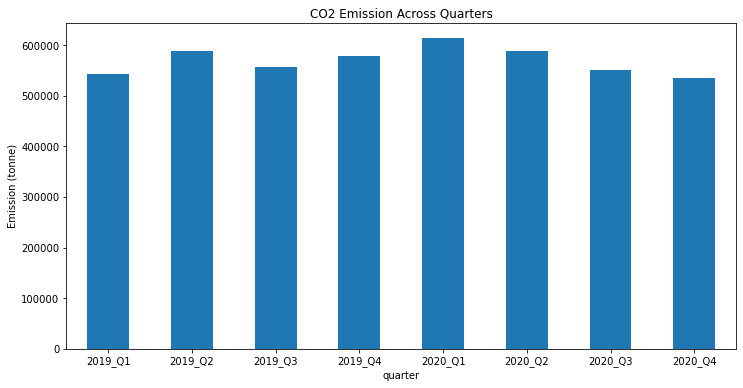

In [195]:
plotq = df_combined.groupby('quarter')['CO2_emission(ton)_avg'].sum().round(0).reset_index()
plotq.plot(kind='bar',x = 'quarter', y = 'CO2_emission(ton)_avg',legend = False, ylabel = 'Emission (tonne)',
           figsize=(12, 6),rot = 0,title = "CO2 Emission Across Quarters") 

Vessel type,Bulk carrier,Container,Ferry,General cargo,Passenger,RoRo,Tanker,Tugs
quarter,,,,,,,,
2019_Q1,45489.0,222114.0,20985.0,7817.0,8900.0,1604.0,204092.0,32430.0
2019_Q2,48949.0,244417.0,23882.0,8826.0,6117.0,1964.0,220096.0,33869.0
2019_Q3,50123.0,228461.0,23674.0,8410.0,2587.0,1716.0,209106.0,32199.0
2019_Q4,49628.0,235241.0,25228.0,8106.0,6946.0,1951.0,218039.0,33025.0
2020_Q1,53999.0,241478.0,20786.0,9213.0,8307.0,1993.0,239264.0,38427.0
2020_Q2,60237.0,242849.0,441.0,8617.0,1205.0,1690.0,240508.0,33028.0
2020_Q3,60008.0,229412.0,623.0,7718.0,3323.0,1809.0,216704.0,30767.0
2020_Q4,50787.0,230264.0,838.0,7362.0,4755.0,1690.0,209175.0,31014.0


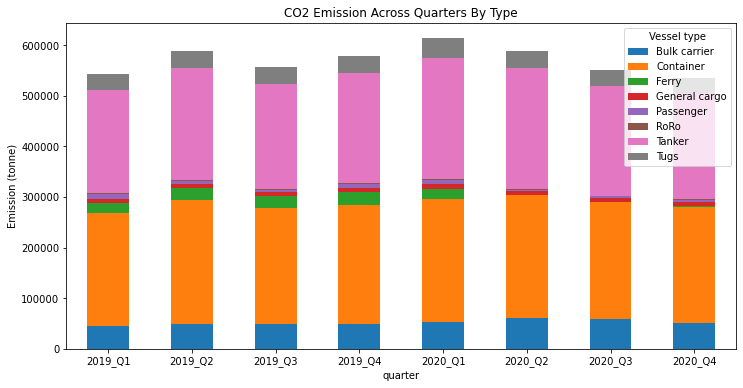

In [196]:
# compare emission in each quarter by type
plotstack = df_combined.groupby(['quarter','Vessel type'])['CO2_emission(ton)_avg'].sum().round(0).unstack()
plotstack.plot(kind='bar',stacked=True,figsize=(12, 6), ylabel = 'Emission (tonne)',rot = 0,title = "CO2 Emission Across Quarters By Type") 
plotstack

**Result4: CB Period Comparison**

In [197]:
covid_df = combined1_2020[(combined1_2020['date'].str.contains('03-')) | (combined1_2020['quarter'] == '2020_Q2')]
covid_df['date'] = pd.to_datetime(covid_df['date'])

def f5(row):
    date = row['date']
    if date < datetime(2020, 3, 27):
        val = 'Before CB'
    elif date < datetime(2020, 4, 7):
        val = 'Prelude'
    elif date < datetime(2020, 4, 21):
        val = 'Initial measures'
    elif date < datetime(2020, 5, 2):
        val = 'Tightened measures'
    elif date < datetime(2020, 6, 1):
        val = 'Relaxed measures'
    else:
        val = 'After CB'
    return val


def map_cb_timeline(df):
    df1 = df.copy()
    df1['CB period'] = df1.apply(f5, axis=1)
    return df1

covid_df1 = map_cb_timeline(covid_df).drop('quarter',axis = 1).sort_values('date')
covid_df1['CB period'] = pd.Categorical(covid_df1['CB period'],
                                        categories=['Before CB','Prelude','Initial measures',
                                        'Tightened measures','Relaxed measures','After CB'])

covid_df1 

,mmsi,imo,date,grossTonnage,yearBuilt,flag,general_type,CO2_emission(ton)_avg,month,CB period
236801,636015176,9592240,2020-03-01,61237,2012,LIBERIAN,Tanker,22.934886,2020_03,Before CB
12844,229469000,9261815,2020-03-01,25703,2002,MALTESE,Container,16.415369,2020_03,Before CB
18677,563041500,9350159,2020-03-01,16472,2007,PANAMANIAN,Container,4.368946,2020_03,Before CB
275426,567002750,9227223,2020-03-01,3490,0,THAI,Tanker,2.516334,2020_03,Before CB
31138,371310000,9867293,2020-03-01,5488,2019,PANAMANIAN,Tanker,2.536729,2020_03,Before CB
...,...,...,...,...,...,...,...,...,...,...
172812,566657000,9511909,2020-06-30,394,2011,SINGAPOREAN,Tugs,8.495185,2020_06,After CB
105741,563221000,9675119,2020-06-30,2999,2013,SINGAPOREAN,Tanker,2.060682,2020_06,After CB
125145,563480000,9742388,2020-06-30,498,2014,SINGAPOREAN,Tanker,4.106544,2020_06,After CB
43252,356839000,9514389,2020-06-30,31754,2010,PANAMANIAN,Bulk carrier,9.324566,2020_06,After CB


In [198]:
temp = covid_df1.groupby('CB period')['imo'].nunique().reset_index()#.to_csv('temp.csv')
temp.groupby('CB period').mean()
# temp.plot(kind='bar',x = 'date', y = 'imo',legend = False, ylabel = 'no. of ships / day',
#             figsize=(20, 6)) 

,imo
CB period,
Before CB,4731
Prelude,2722
Initial measures,3238
Tightened measures,2827
Relaxed measures,5106
After CB,5398


,CB period,imo
0,Before CB,780.0
1,Prelude,734.0
2,Initial measures,804.0
3,Tightened measures,781.0
4,Relaxed measures,725.0
5,After CB,755.0


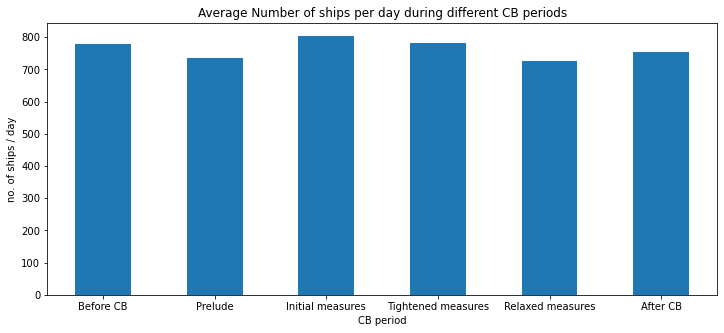

In [200]:
temp = covid_df1.groupby(['CB period','date'])['imo'].nunique().reset_index()
temp = temp[temp['imo']!= 0]
covid_df2 = temp.groupby('CB period')['imo'].mean().round(0).reset_index()


covid_df2.plot(kind='bar',x = 'CB period', y = 'imo',legend = False, ylabel = 'no. of ships / day',
            figsize=(12, 5),rot = 0,title = 'Average Number of ships per day during different CB periods') 
covid_df2
# temp.plot(kind='bar',x = 'date', y = 'imo',legend = False, ylabel = 'no. of ships / day',
#             figsize=(20, 6)) 

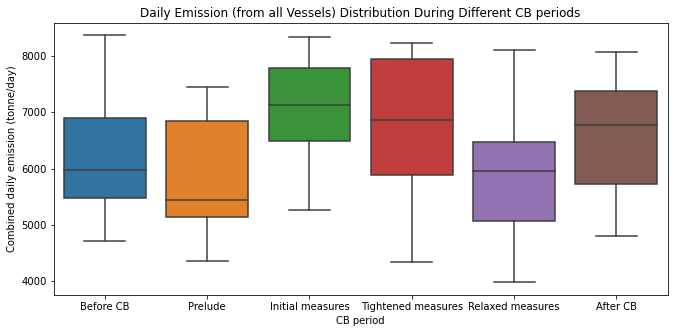

In [204]:
# Combined Daily Emission (from all Vessels) Distribution During Different CB periods
covid_df2 = covid_df1.groupby(['CB period','date'])['CO2_emission(ton)_avg'].sum().round(0).reset_index()
covid_df2 = covid_df2.rename(columns= {'CO2_emission(ton)_avg':'Combined daily emission (tonne/day)'})
#covid_df3 = covid_df2.groupby('CB period')['Total Daily Emission'].mean().round(0).reset_index().rename(columns= {'Total Daily Emission':'Average Daily Emission (from all vessels)'})

plt.figure(figsize=(11, 5))
ax = sns.boxplot(x = 'CB period', y = 'Combined daily emission (tonne/day)', 
                 data = covid_df2, showfliers=False).set_title("Daily Emission (from all Vessels) Distribution During Different CB periods")


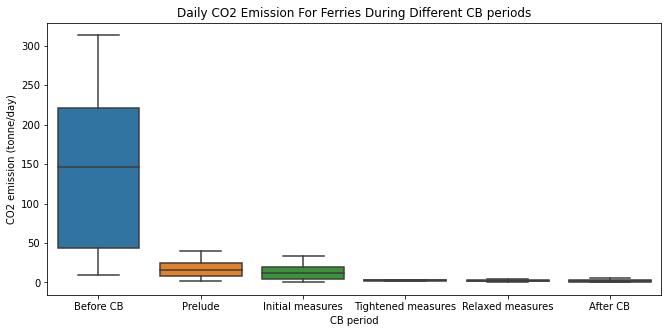

In [205]:
# plot for ferries only
covid_df3 = covid_df1[covid_df1['general_type']=='Ferry'].groupby(['CB period','date'])['CO2_emission(ton)_avg'].sum().round(0).reset_index()\
    .sort_values('date').rename(columns={'CO2_emission(ton)_avg':'CO2 emission (tonne/day)'})
plt.figure(figsize=(11, 5))
ax = sns.boxplot(x = 'CB period', y = 'CO2 emission (tonne/day)', 
                 data = covid_df3, showfliers=False).set_title("Daily CO2 Emission For Ferries During Different CB periods")

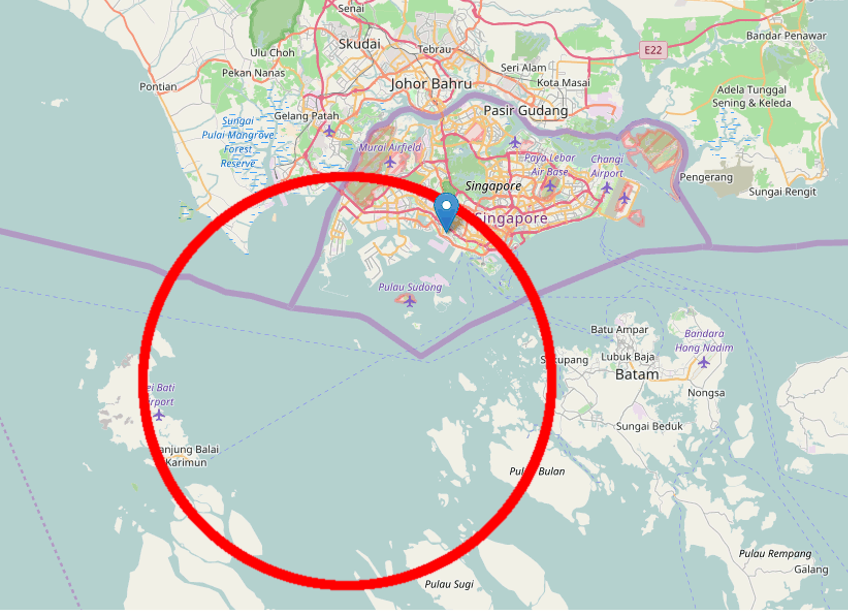

In [3]:
display.Image("Picture 1.png",width = 700)

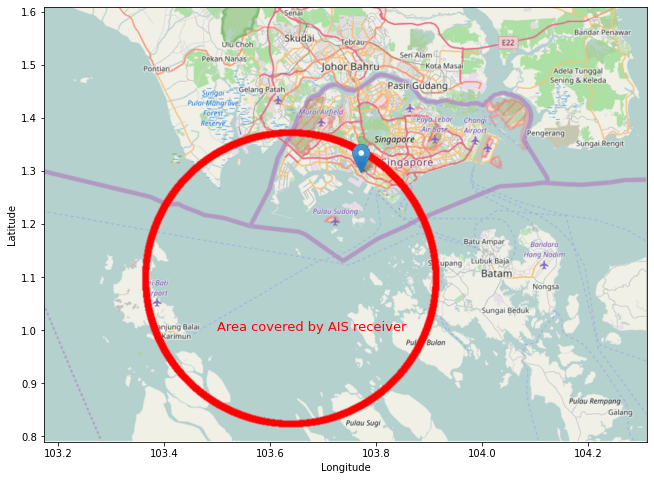

In [37]:
#$103.1744,0.7898,104.3104,1.6095
    
BBox = (103.1744, 104.3104, 0.7898, 1.6095)
ruh_m = plt.imread('Picture 1.png')

fig, ax = plt.subplots(figsize = (12,8))
#ax.set_title('AIS data covered area',fontsize=20)
ax.text(103.5, 1.0,'Area covered by AIS receiver', fontsize=13,c='red')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [47]:
df = pd.read_json('../2019 data/ais-processed-log-2019-03.json') #all 2020 data

In [66]:
df1 = df[df['type'].isin([1,2,3])][["mmsi","speed","time","lon","lat"]]
df2 = df1[df1['speed']>0]
df3 = df2[(df2['mmsi'] >= (10**8)) & (df2['mmsi'] < (10**9))]
df4 = df3[(df3['lon'] >= 103.4232) & (df3['lon']<=104.1297) & (df3['lat'] >= 0.9854) & (df3['lat']<=1.4942)]

In [67]:
df4

,mmsi,speed,time,lon,lat
0,538003851,2.7,2019-03-01T00:00:04Z,103.69615,1.18077
1,566339000,0.1,2019-03-01T00:00:27Z,103.71064,1.17799
2,563031200,9.1,2019-03-01T00:00:27Z,103.63990,1.19683
3,538005747,11.9,2019-03-01T00:00:27Z,103.85835,1.20013
4,565554000,0.1,2019-03-01T00:00:27Z,103.74797,1.29653
...,...,...,...,...,...
4157952,564750000,0.1,2019-03-31T23:59:48Z,103.68501,1.23524
4157953,563354000,0.4,2019-03-31T23:59:48Z,103.76051,1.29086
4157954,563029960,1.6,2019-03-31T23:59:48Z,103.75048,1.29522
4157955,563918000,0.1,2019-03-31T23:59:48Z,103.76017,1.29083


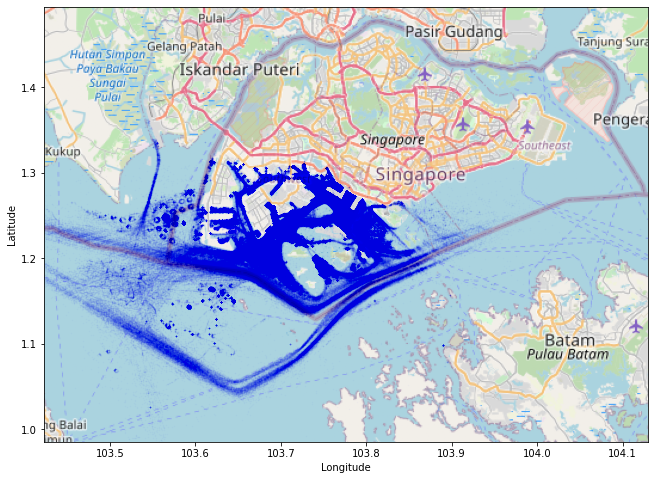

In [82]:
BBox = (103.4232, 104.1297, 0.9854, 1.4942)
ruh_m = plt.imread('map.png')

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(df4.lon, df4.lat, zorder=1, alpha= 0.01, c='b', s=1)
#ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')